### AI Powered Inventary Management

Importing Necessary Libraries 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


Loading the Dataset

In [102]:
df=pd.read_csv("C:/Users/Nikhil G/Desktop/Inventary management/Project.csv")
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


Performing Exploratory Data Analysis (EDA)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

In [104]:
df.shape

(149116, 18)

In [105]:
df.describe()

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,5.342063,47.918607,1.438276,3.382219,4.686367,11.735790,3.988881,2.982336
std,43153.600016,2.074241,17.930020,0.542509,2.658723,4.227099,3.764662,1.673091,1.996650
min,1.000000,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,1.000000,0.000000
25%,37335.750000,3.000000,33.000000,1.000000,2.500000,3.000000,9.000000,3.000000,1.000000
50%,74727.500000,5.000000,47.000000,1.000000,3.000000,3.750000,11.000000,4.000000,3.000000
75%,112094.250000,8.000000,60.000000,2.000000,3.750000,6.000000,15.000000,5.000000,5.000000
max,149456.000000,8.000000,87.000000,8.000000,45.000000,360.000000,20.000000,6.000000,6.000000


In [106]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64

In [107]:
#Removing the unnecessary columns
df=df.drop(columns=['Hour','Month','Day of Week'])

In [108]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month

In [109]:
#Adding the Season column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)


In [110]:
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,year,month,season
0,114301,2023-06-01,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,2023,6,Summer
1,115405,2023-06-02,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,2023,6,Summer
2,115478,2023-06-02,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,2023,6,Summer
3,116288,2023-06-02,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,2023,6,Summer
4,116714,2023-06-03,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,2023,6,Summer


Visualisations

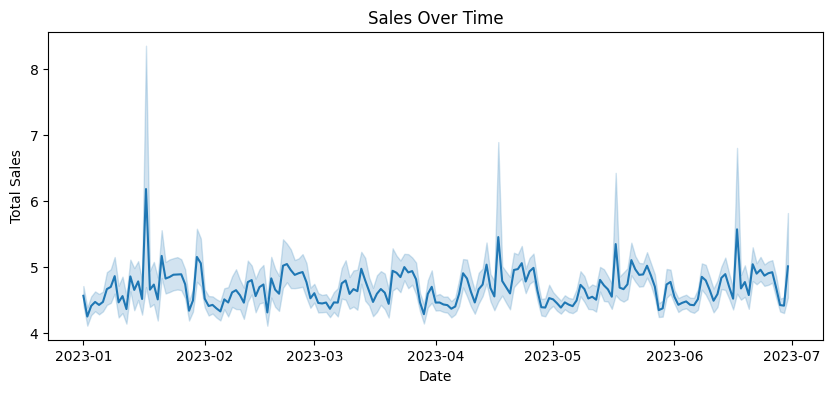

In [111]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='transaction_date', y='Total_Bill')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

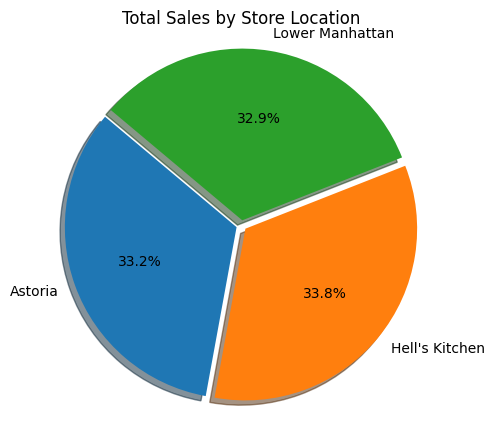

In [127]:
sales_by_location = df.groupby('store_location')['Total_Bill'].sum().reset_index()
labels = sales_by_location['store_location']
sizes = sales_by_location['Total_Bill']
explode = [0.03] * len(sales_by_location)  

plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Total Sales by Store Location')
plt.axis('equal')
plt.show()

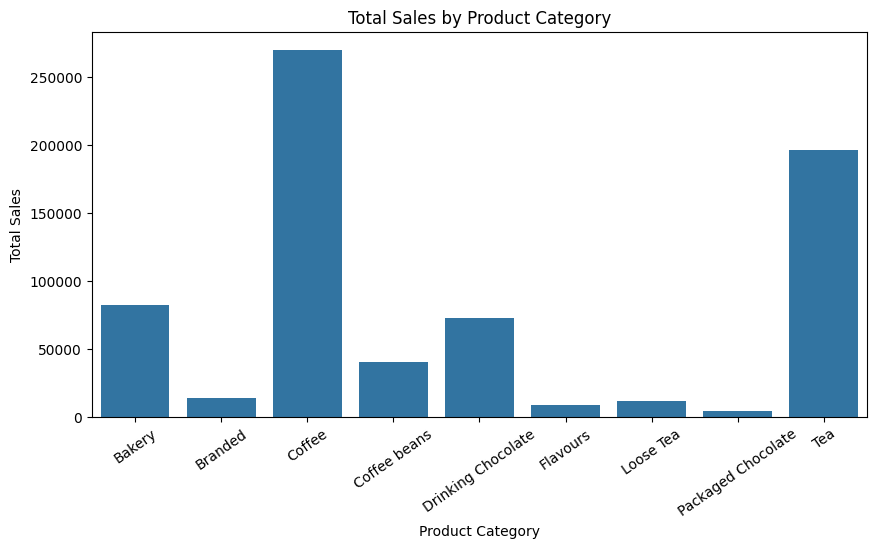

In [113]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df.groupby('product_category')['Total_Bill'].sum().reset_index(), x='product_category', y='Total_Bill')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=35)
plt.show()


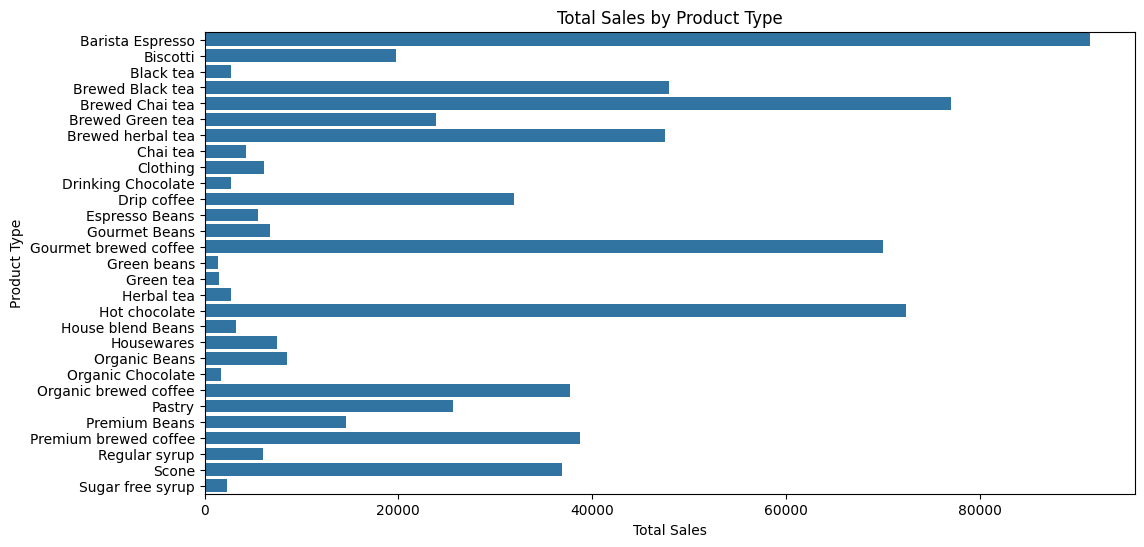

In [114]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df.groupby('product_type')['Total_Bill'].sum().reset_index(), y='product_type', x='Total_Bill', orient='h')
plt.title('Total Sales by Product Type')
plt.xlabel('Total Sales')
plt.ylabel('Product Type')
plt.show()


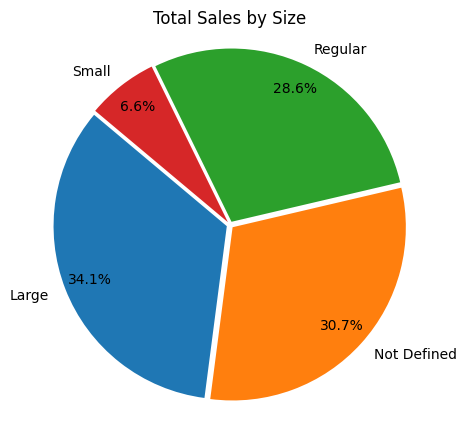

In [126]:
size_sales = df.groupby('Size')['Total_Bill'].sum().reset_index()

plt.figure(figsize=(5, 5))
plt.pie(size_sales['Total_Bill'], labels=size_sales['Size'], autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=[0.02] * len(size_sales))
plt.title('Total Sales by Size')
plt.axis('equal')  
plt.show()

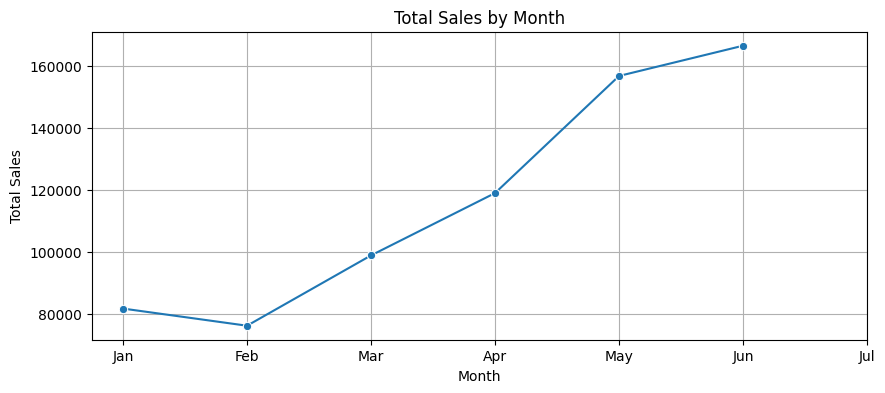

In [116]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df.groupby('month')['Total_Bill'].sum().reset_index(), x='month', y='Total_Bill', marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 8), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'])
plt.grid(True)
plt.show()


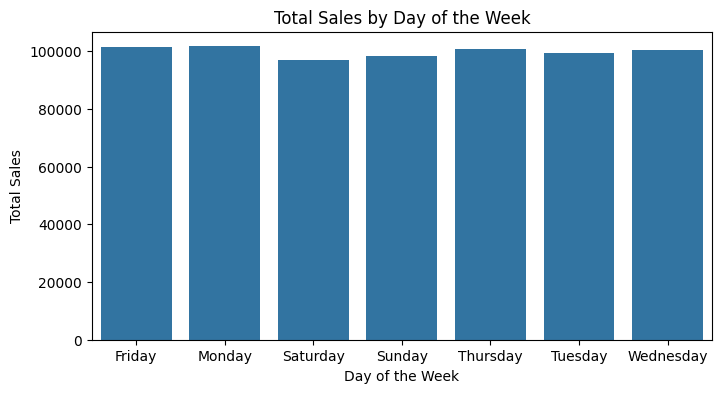

In [117]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df.groupby('Day Name')['Total_Bill'].sum().reset_index(), x='Day Name', y='Total_Bill')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()


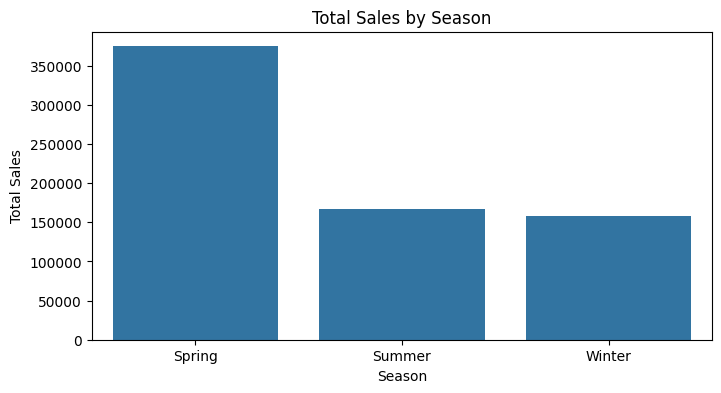

In [118]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df.groupby('season')['Total_Bill'].sum().reset_index(), x='season', y='Total_Bill')
plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()


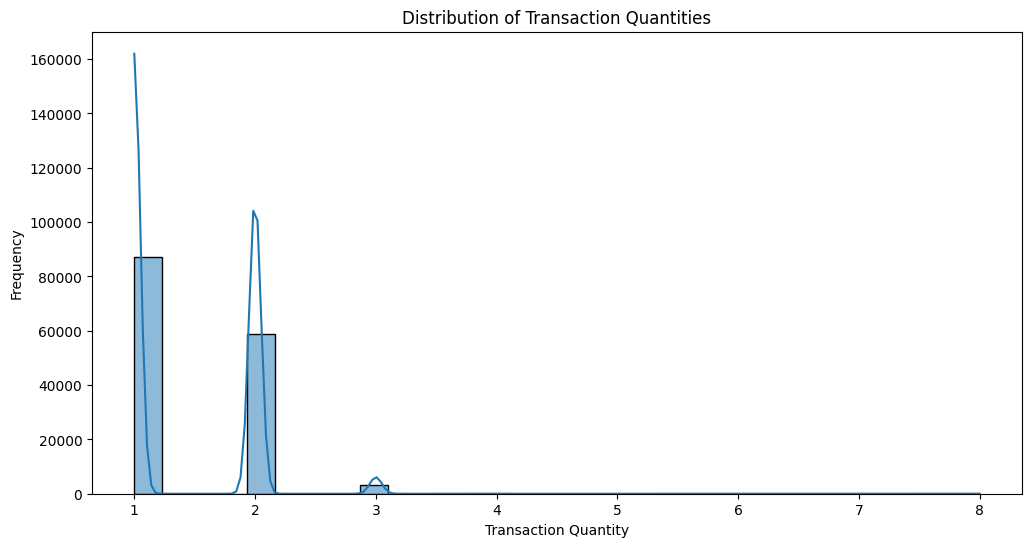

In [119]:
plt.figure(figsize=(12, 6))
sns.histplot(df['transaction_qty'], bins=30, kde=True)
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Transaction Quantity')
plt.ylabel('Frequency')
plt.show()


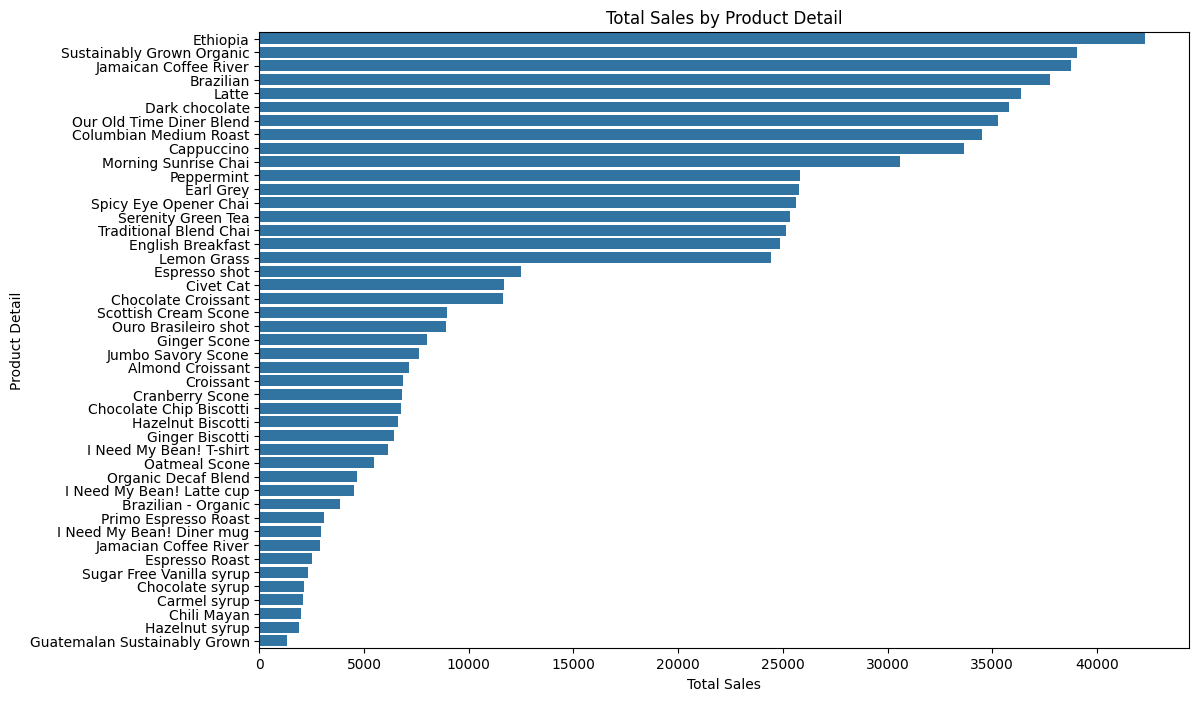

In [120]:
# Group by 'product_detail' and sum 'Total_Bill'
product_sales = df.groupby('product_detail')['Total_Bill'].sum().reset_index()
product_sales = product_sales.sort_values(by='Total_Bill', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=product_sales, y='product_detail', x='Total_Bill', orient='h')
plt.title('Total Sales by Product Detail')
plt.xlabel('Total Sales')
plt.ylabel('Product Detail')
plt.show()

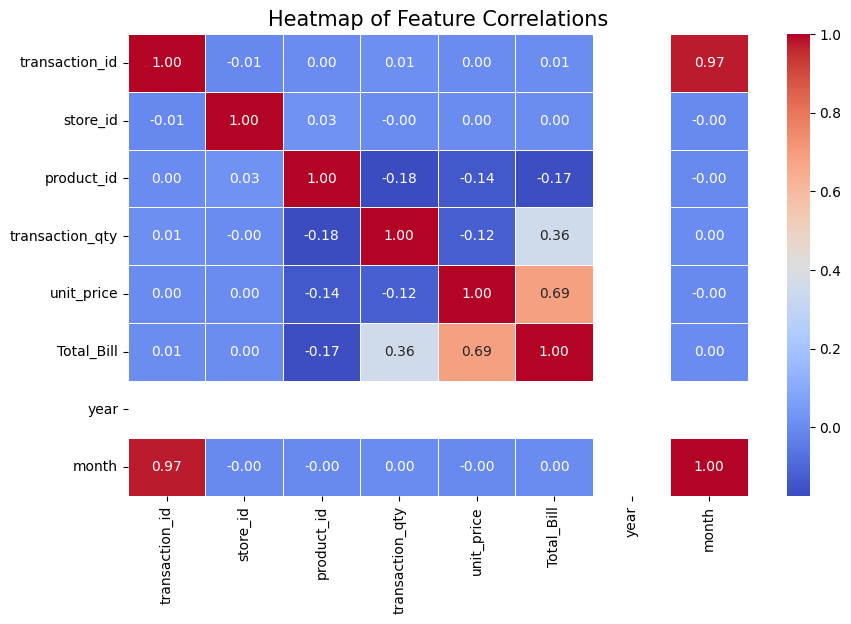

In [121]:
# Select only numerical columns (excluding columns like time, strings, etc.)
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Heatmap of Feature Correlations', fontsize=15)
plt.show()


Predictive Analysis and Forecasting

C:\Users\Nikhil G\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Nikhil G\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



2023-07-01    5510.132581
2023-07-02    5650.044677
2023-07-03    5364.147794
2023-07-04    5441.482122
2023-07-05    5406.125268
2023-07-06    5596.670607
2023-07-07    5771.817178
2023-07-08    5705.611834
2023-07-09    5629.017947
2023-07-10    5628.569467
2023-07-11    5664.611756
2023-07-12    5788.449278
2023-07-13    5885.874428
2023-07-14    5868.070574
2023-07-15    5675.036097
2023-07-16    5710.986404
2023-07-17    5706.710056
2023-07-18    5887.081515
2023-07-19    6012.103157
2023-07-20    5974.656389
2023-07-21    5925.144968
2023-07-22    5733.293310
2023-07-23    5721.082907
2023-07-24    5984.173651
2023-07-25    6071.061491
2023-07-26    6077.479173
2023-07-27    5870.183170
2023-07-28    5912.489109
2023-07-29    5903.439512
2023-07-30    6085.373444
Freq: D, Name: predicted_mean, dtype: float64


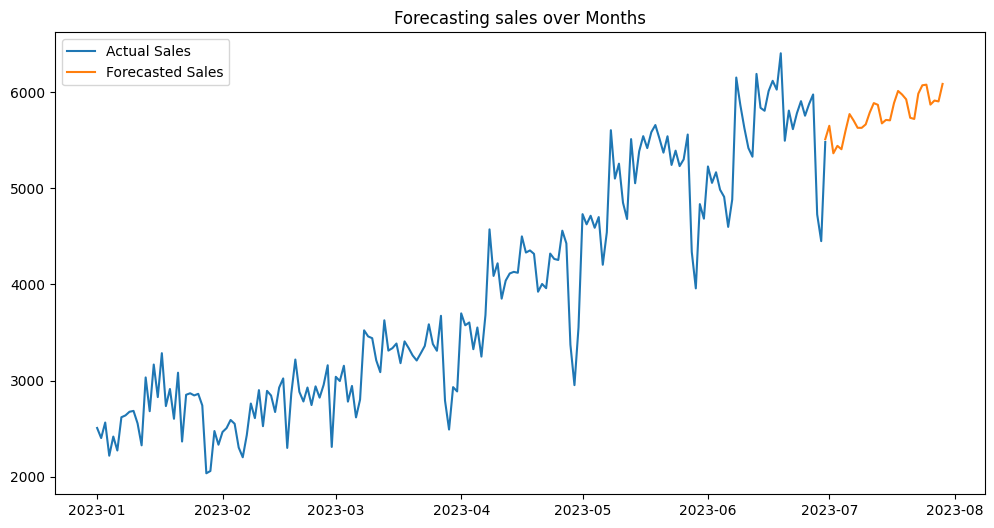

In [122]:
# Fit the SARIMA model with seasonal component
sarima_model = sm.tsa.SARIMAX(df_sales['Total_Bill'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecast future sales
sarima_forecast = sarima_result.forecast(steps=30)
print(sarima_forecast)

plt.figure(figsize=(12, 6))
plt.plot(df_sales.index, df_sales['Total_Bill'], label='Actual Sales')
plt.plot(pd.date_range(df_sales.index[-1], periods=30, freq='D'), sarima_forecast, label='Forecasted Sales')
plt.title('Forecasting sales over Months')
plt.legend()
plt.show()


C:\Users\Nikhil G\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0656
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


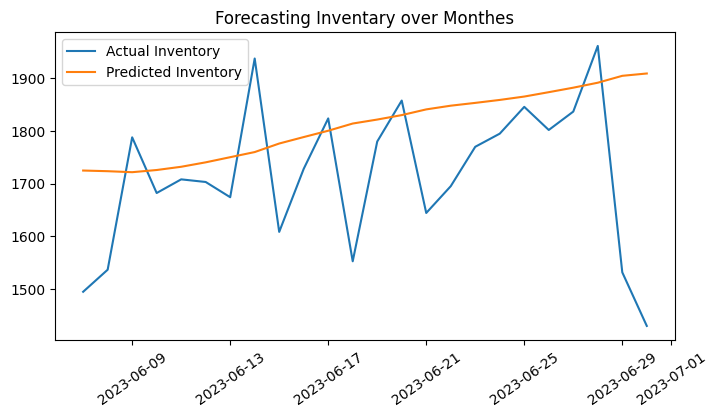

In [123]:
# Aggregate the data by transaction date
df_inventory = df.groupby('transaction_date')['transaction_qty'].sum().reset_index()
df_inventory.set_index('transaction_date', inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_inventory.values)

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM Model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

plt.figure(figsize=(8, 4))
plt.plot(df_inventory.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Inventory')
plt.plot(df_inventory.index[-len(y_pred):], y_pred, label='Predicted Inventory')
plt.title('Forecasting Inventary over Monthes')
plt.xticks(rotation=35)
plt.legend()
plt.show()


C:\Users\Nikhil G\AppData\Local\Temp\ipykernel_6668\1849529498.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Nikhil G\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.



2023-07-31    183204.996703
2023-08-31    202288.183058
2023-09-30    221832.438078
2023-10-31    233234.720783
2023-11-30    246569.632132
2023-12-31    260614.560576
2024-01-31    273110.077719
2024-02-29    282989.171182
2024-03-31    293259.853583
2024-04-30    303305.902094
2024-05-31    312170.394081
2024-06-30    320014.842611
Freq: ME, Name: predicted_mean, dtype: float64


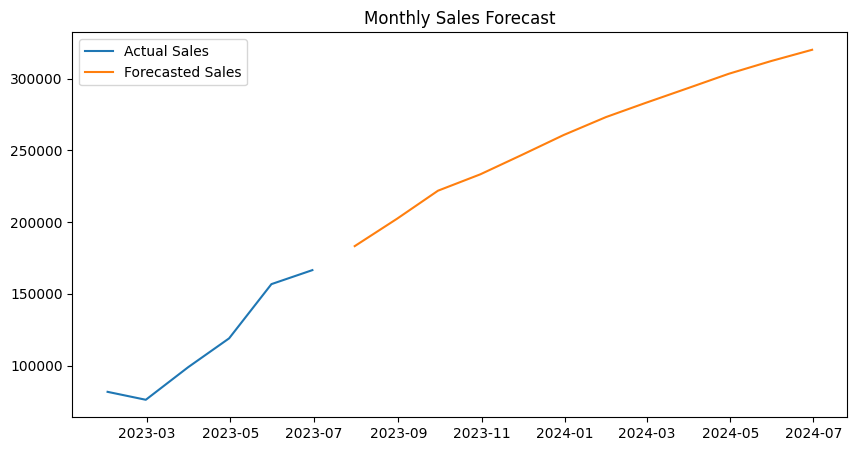

In [124]:
df_ts = df.set_index('transaction_date')
# Create a monthly sales time series
monthly_sales = df_ts.resample('M')['Total_Bill'].sum()

# Fit an ARIMA model
model = ARIMA(monthly_sales, order=(5, 1, 0))  # (p, d, q) parameters
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)
print(forecast)

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, label='Actual Sales')
plt.plot(forecast, label='Forecasted Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.show()


Epoch 1/3


C:\Users\Nikhil G\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3727/3727 ━━━━━━━━━━━━━━━━━━━━ 162s 43ms/step - loss: 8.0305e-05
Epoch 2/3
3727/3727 ━━━━━━━━━━━━━━━━━━━━ 155s 42ms/step - loss: 5.5106e-05
Epoch 3/3
3727/3727 ━━━━━━━━━━━━━━━━━━━━ 156s 42ms/step - loss: 3.5909e-05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

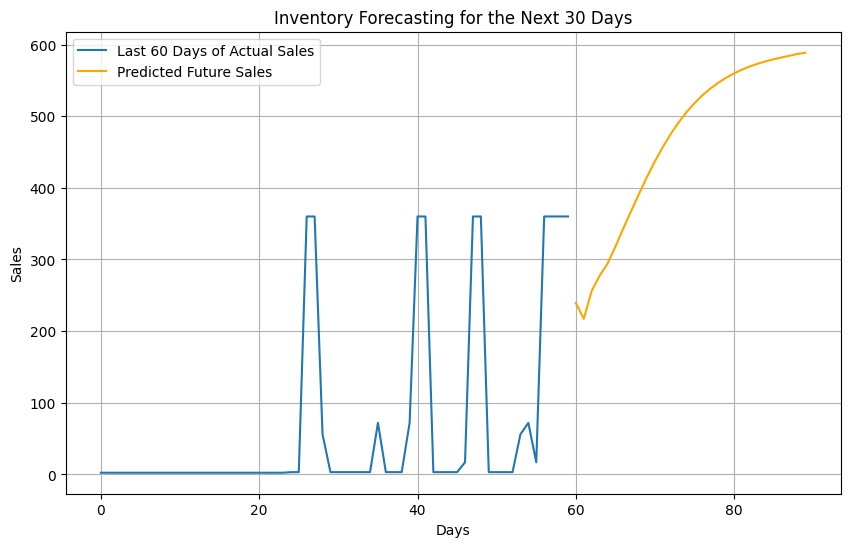

In [125]:
# Prepare data for LSTM
df_ts = df.set_index('transaction_date')
sales = df_ts['Total_Bill'].values.reshape(-1, 1)
scaler = MinMaxScaler()
sales_scaled = scaler.fit_transform(sales)

# Prepare input/output pairs for LSTM
X, y = [], []
for i in range(60, len(sales_scaled)):
    X.append(sales_scaled[i-60:i, 0])
    y.append(sales_scaled[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=3, batch_size=40)

# Predict future sales for the next 30 days
future_days = 30
last_60_days = sales_scaled[-60:]  # Last 60 days data for future predictions
predicted_sales = []

for _ in range(future_days):
    X_future = last_60_days.reshape(1, last_60_days.shape[0], 1)
    predicted_value = model.predict(X_future)
    predicted_sales.append(predicted_value[0, 0])

    last_60_days = np.append(last_60_days, predicted_value, axis=0)
    last_60_days = last_60_days[1:]

# Inverse transform to get actual sales values
predicted_sales = np.array(predicted_sales).reshape(-1, 1)
predicted_sales = scaler.inverse_transform(predicted_sales)

plt.figure(figsize=(10, 6))
plt.plot(sales[-60:], label='Last 60 Days of Actual Sales')
plt.plot(np.arange(60, 90), predicted_sales, label='Predicted Future Sales', color='orange')
plt.title('Inventory Forecasting for the Next 30 Days')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
